**IRIS DATA CLASSIFICATION**

loading all the required libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import string
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
import graphviz
from sklearn.tree import export_graphviz
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from ipywidgets import interact

loading the IRIS dataset

In [2]:
data=pd.read_csv("IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


displaying the shape of the dataset

In [4]:
data.shape

(150, 5)

displaying the columns of the dataset

In [5]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

displaying the data types of the columns in the dataset

In [6]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

to check if the data contains any null values. If yes, lets drop the null values

In [7]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

to check if the data contains any duplicated values. If yes then lets drop it

In [8]:
data.duplicated().sum()

3

In [10]:
data=data.drop_duplicates(keep='first')

In [11]:
data.duplicated().sum()

0

to check if the data contains any NaN values

In [12]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

getting the description of the numerical columns in then dataset

In [13]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


creating a countplot for the count of the different species present in the dataset

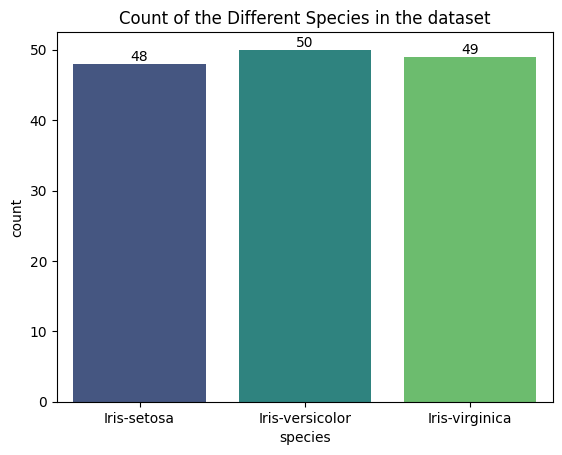

In [15]:
ax=sns.countplot(x='species',data=data,palette='viridis')
plt.title("Count of the Different Species in the dataset")
for bars in ax.containers:
  ax.bar_label(bars)

MODEL DEVELOPMENT

In [17]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


lets map the species column values with integers

1=Iris-setosa

2=Iris-versicolor

3=Iris-virginica

In [19]:
data['Species_Label']=data['species'].map({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3})

In [20]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Species_Label
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


creating training and testing data

In [21]:
x=data[['sepal_length','sepal_width','petal_length','petal_width']]

In [22]:
y=data['Species_Label']

In [23]:
z=data['species']

In [42]:
lr=LogisticRegression()
dtc=DecisionTreeClassifier(max_depth=3)
km=KMeans(n_clusters=3)

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

testing Logistic regression Model

In [26]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
prediction1=lr.predict(x_test)

In [28]:
acc_score_lr=accuracy_score(y_test,prediction1)

In [29]:
acc_score_lr

0.9666666666666667

testing Kmeans Model

In [32]:
km.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [37]:
prediction2=km.predict(x_test)


In [34]:
acc_score_km=accuracy_score(y_test,prediction2)

In [35]:
acc_score_km

0.0

testing Decistion Tree Classifier Model

In [43]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [44]:
prediction3=dtc.predict(x_test)

In [45]:
acc_score_dtc=accuracy_score(y_test,prediction3)

In [46]:
acc_score_dtc

0.9666666666666667

visualizing the decision tree

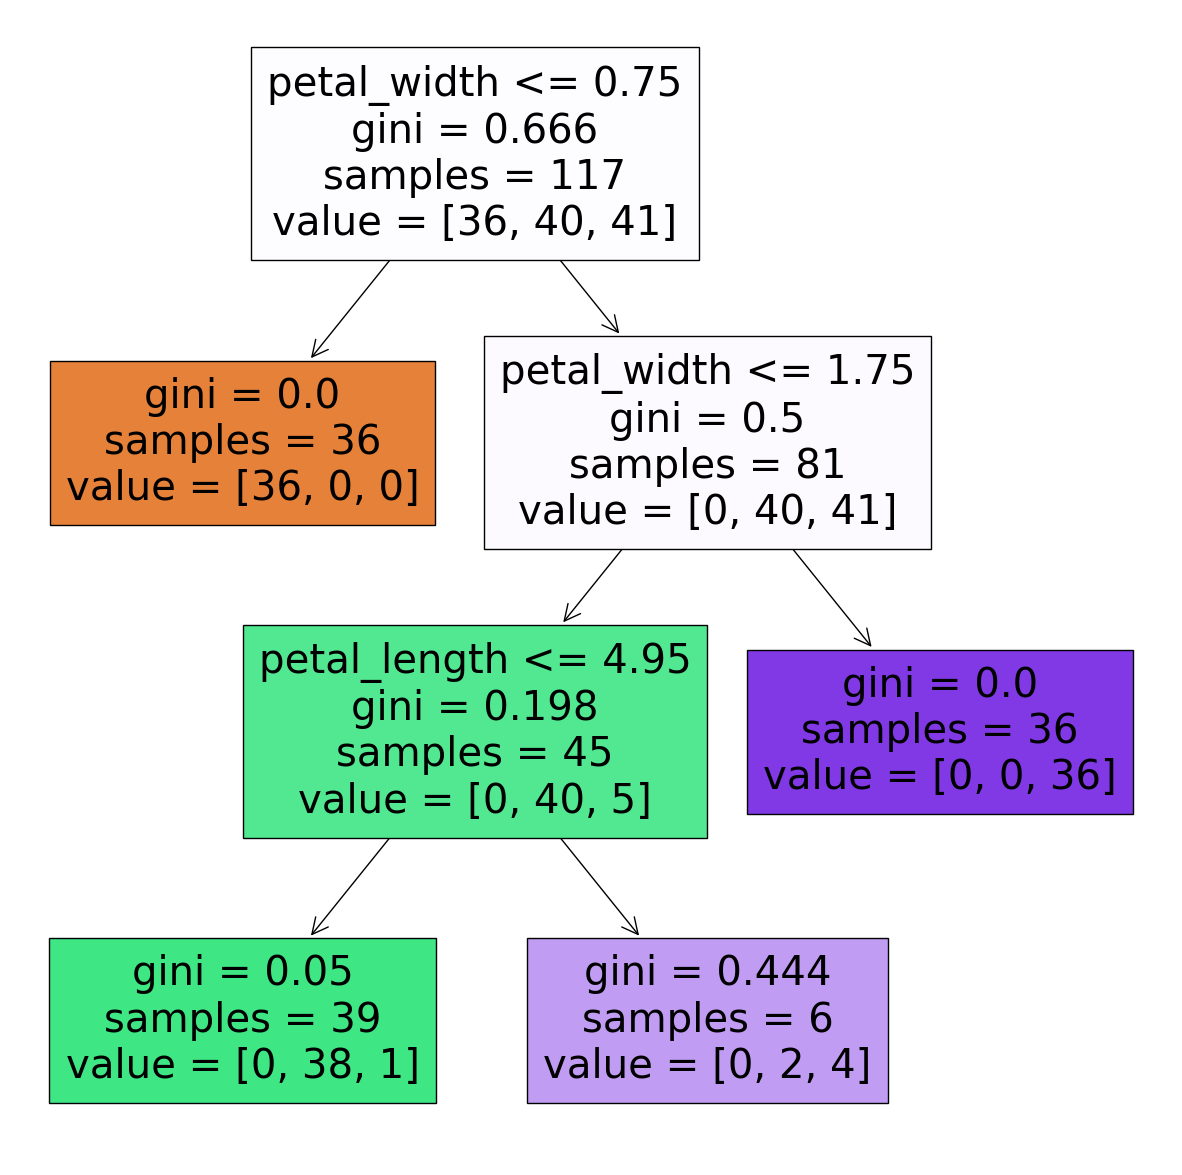

In [52]:
plt.figure(figsize=(15,15))
plot_tree(dtc,filled=True,feature_names=x.columns)
plt.show()

creating a dataframe of the accuracy of tthe models

In [47]:
data_model={'Name_of_Model':['Logistic Regression','KMeans','Decision Tree Classifier'],'Accuracy_of_Model':[acc_score_lr,acc_score_km,acc_score_dtc]}

In [48]:
report=pd.DataFrame(data_model)

In [49]:
report

,Name_of_Model,Accuracy_of_Model
0,Logistic Regression,0.966667
1,KMeans,0.000000
2,Decision Tree Classifier,0.966667


this shows that both Logistic Regression and Decision Tree Classifier Model make best predictions